In [1]:
from matplotlib import pyplot as plt

from tensorflow import keras
from keras import layers
from keras.datasets import mnist

In [2]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

In [3]:
(images, labels), (test_images, test_labels) = mnist.load_data()

images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()

In [4]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 25s 14ms/step - loss: 0.2941 - accuracy: 0.9127 - val_loss: 0.1452 - val_accuracy: 0.9561
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1595 - accuracy: 0.9534 - val_loss: 0.1155 - val_accuracy: 0.9687
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1299 - accuracy: 0.9631 - val_loss: 0.1074 - val_accuracy: 0.9722
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1128 - accuracy: 0.9679 - val_loss: 0.1039 - val_accuracy: 0.9736
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1035 - accuracy: 0.9718 - val_loss: 0.0908 - val_accuracy: 0.9766
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0946 - accuracy: 0.9737 - val_loss: 0.0959 - val_accuracy: 0.9766
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0885 - accuracy: 0.9761 - val_loss: 0.0915 - val_

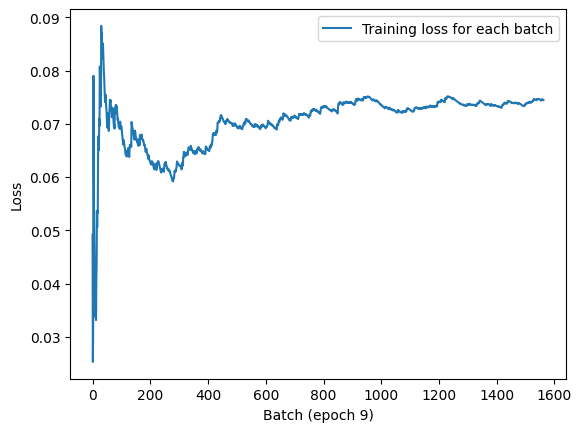

In [5]:
model = get_mnist_model()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)